# Set up

## Package Loading

In [1]:
import pandas as pd
import numpy as np
import itertools
#!pip install emoji
#!pip install imblearn
import emoji
import re
#!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, make_scorer
import matplotlib.pyplot as plt
import time
import joblib

#from google.colab import drive
#drive.mount('/content/drive')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13122\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\13122\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Set Up paths

In [2]:
# Parent paths
google_path = '/content/drive/My Drive/'
local_path = 'D:/TP/'
parent_path = local_path

#Specific paths
path_train = parent_path+"data/external/Harmful_and_Cyberbullying/data.csv" 
#path_test = parent_path+"data/external/Harmful/test_tweet.csv" 
path_preprocessed = parent_path+"data/processed/Harmful_and_Cyberbullying/preprocessed_data_final.csv" 

path_hyperparameters_sgd = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/sgd.csv"
path_hyperparameters_svm = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/svm.csv"
path_hyperparameters_et = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/et.csv"
path_hyperparameters_rf = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/rf.csv"
path_hyperparameters_nb = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/nb.csv"
path_hyperparameters_knn = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/knn.csv"
path_hyperparameters_lr = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/lr.csv"
path_hyperparameters_dt = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/dt.csv"

path_best_parameters_sgd = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/best_parameters/sgd.pkl"
path_best_parameters_svm = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/best_parameters/svm.pkl"
path_best_parameters_et = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/best_parameters/et.pkl"
path_best_parameters_rf = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/best_parameters/rf.pkl"
path_best_parameters_nb = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/best_parameters/nb.pkl"
path_best_parameters_knn = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/best_parameters/knn.pkl"
path_best_parameters_lr = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/best_parameters/lr.pkl"
path_best_parameters_dt = parent_path+"models/English/Classical_approach/Harmful_and_Cyberbullying/Hyperparameters/best_parameters/dt.pkl"

# Set Up Functions

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Balance Dataset

In [4]:
# loading preprocessd data
df = pd.read_csv(path_preprocessed)
df = df[df['text'].apply(lambda x: isinstance(x, str))] # Temporal solution

<AxesSubplot:>

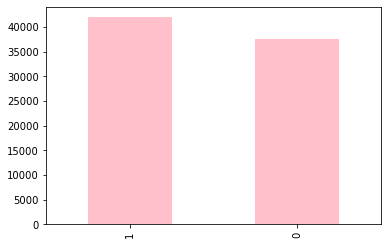

In [5]:
df['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

## Train, Validation, Test Split

In [6]:
# split
x_train, x_test = train_test_split(df, test_size=0.2, random_state = 453, stratify=df['label'])
x_test, x_valid = train_test_split(x_test, test_size=0.5 , random_state = 453, stratify= x_test['label'])

y_train = x_train['label']
x_train = x_train['text']
#del x_train['label']

y_test = x_test['label']
x_test = x_test['text']
#del x_test['label']

y_valid = x_valid['label']
x_valid = x_valid['text']
#del x_valid['label']

x_train= x_train.append(x_valid, ignore_index=True)
y_train= y_train.append(y_valid, ignore_index=True)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)
display(x_train)

(71686,)
(7966,)
(7965,)


0        Wow typical . “ Colored people ” ? ? Wow ... d...
1                I class cause foggy outside . # dangerous
2        # angel # archangel high help live # spiritual...
3                      @ aayyyBAYBAY grabbed cheek . # WTF
4        happy year ! # lovinglife # bestdecisionever #...
                               ...                        
71681               @ LizQuilty I heard . But I eye open .
71682                      friend playing work ð # rhcp
71683     # friday ! # eso later evening ! # fridayfeeling
71684    I anti-Semitic Breaking Bad & gt ; & gt ; Bett...
71685    father ! # smile # lifeisgood # live # life # ...
Name: text, Length: 71686, dtype: object

# Evaluate models in a Pipeline

## Evaluation function

In [108]:
def model_evaluation (estimator, path_best_parameters):
    best_para = joblib.load(path_best_parameters)
    vectorizer = TfidfVectorizer()
    pipeline = Pipeline([ ('vectorizer', vectorizer), ('estimator', estimator) ])
    pipeline.set_params(**best_para)
    print(pipeline)
    pipeline.fit(x_train, y_train)
    start_time = time.time()
    prediction = pipeline.predict(x_test)
    print("--- %s seconds ---" % (time.time() - start_time))
    cm = confusion_matrix(y_test, prediction)
    plot_confusion_matrix(cm, classes = unique_labels(y_test), title = "NB Classifier on Test Set")
    print(classification_report(y_test, prediction))

## Naïve Bayes

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.25, norm='l1')),
                ('estimator', MultinomialNB(alpha=1))])
--- 0.10272407531738281 seconds ---
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      3766
           1       0.80      0.97      0.88      4199

    accuracy                           0.86      7965
   macro avg       0.88      0.85      0.85      7965
weighted avg       0.88      0.86      0.86      7965



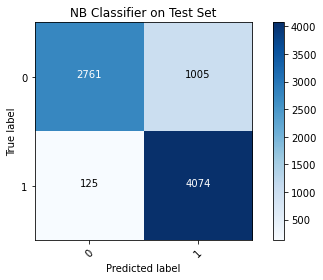

In [109]:
estimator = MultinomialNB()
model_evaluation(estimator, path_best_parameters_nb)

# Random Forest

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.25)),
                ('estimator',
                 RandomForestClassifier(n_estimators=500, random_state=42))])
--- 5.807015419006348 seconds ---
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3766
           1       0.88      0.89      0.89      4199

    accuracy                           0.88      7965
   macro avg       0.88      0.88      0.88      7965
weighted avg       0.88      0.88      0.88      7965



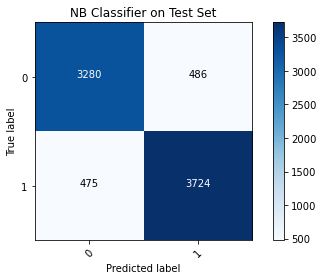

In [113]:
# Optimize parameters for Random Forest
estimator = RandomForestClassifier(random_state=42)
model_evaluation(estimator, path_best_parameters_rf)

# Logistic Regression

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.5, norm=None)),
                ('estimator', LogisticRegression(C=0.01, solver='saga'))])


D:\software\empty\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


--- 0.09383893013000488 seconds ---
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3766
           1       0.89      0.90      0.89      4199

    accuracy                           0.89      7965
   macro avg       0.89      0.89      0.89      7965
weighted avg       0.89      0.89      0.89      7965



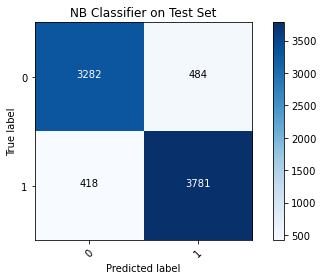

In [110]:
# Evaluate the pipeline on the test set 
estimator = LogisticRegression()
model_evaluation(estimator, path_best_parameters_lr)


# SGD

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.25, norm=None)),
                ('estimator',
                 SGDClassifier(alpha=0.01, max_iter=5000, random_state=42,
                               tol=0.01))])
--- 0.09414124488830566 seconds ---
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3766
           1       0.91      0.89      0.90      4199

    accuracy                           0.90      7965
   macro avg       0.90      0.90      0.90      7965
weighted avg       0.90      0.90      0.90      7965



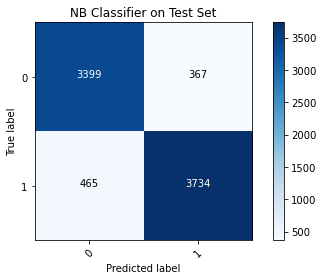

In [111]:
# Evaluate the pipeline on the test set 
estimator = SGDClassifier(max_iter=5000, random_state=42)
model_evaluation(estimator, path_best_parameters_sgd)

## SVM

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.15, smooth_idf=False)),
                ('estimator',
                 LinearSVC(C=1, loss='hinge', max_iter=5000, random_state=42,
                           tol=1))])
--- 0.11137676239013672 seconds ---
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3766
           1       0.89      0.91      0.90      4199

    accuracy                           0.89      7965
   macro avg       0.89      0.89      0.89      7965
weighted avg       0.89      0.89      0.89      7965



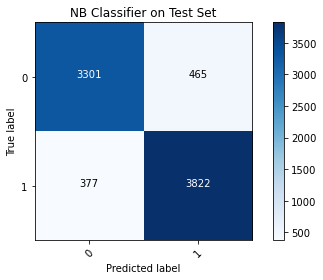

In [112]:
# Evaluate the pipeline on the test set 
estimator = LinearSVC(max_iter=5000, random_state=42, dual = True)
model_evaluation(estimator, path_best_parameters_svm)
